




# Segment Profiling and Visualization:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the CSV files into DataFrames
purchase_history_df = pd.read_csv('purchase_history.csv')
marketing_campaigns_df = pd.read_csv('marketing_campaigns.csv')



## Creating a merged dataframes for csv to perform segmentation and profiling

In [2]:
# Merge the DataFrames on 'CustomerID'
merged_df = pd.merge(purchase_history_df, marketing_campaigns_df, on='CustomerID', how='inner')

# Data cleaning and preparation
merged_df['PurchaseDate'] = pd.to_datetime(merged_df['PurchaseDate'])
merged_df['InteractionDate'] = pd.to_datetime(merged_df['InteractionDate'])
merged_df['Price'] = merged_df['Price'].astype(float)
merged_df['Quantity'] = merged_df['Quantity'].astype(int)


## Feature engineering

In [3]:
# Feature engineering: calculate total spend per purchase
merged_df['TotalSpend'] = merged_df['Price'] * merged_df['Quantity']

# Clean 'Outcome' column and identify successful interactions
merged_df['Outcome'] = merged_df['Outcome'].str.strip().str.lower()

# Define success condition
success_condition = merged_df['Outcome'] == 'converted'

## Grouping and Aggregating data

In [4]:
# Aggregate data at the customer level
customer_df = merged_df.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'Quantity': 'sum',
    'Product': 'nunique',
    'Campaign': 'nunique',
    'Outcome': lambda x: success_condition[x.index].mean()  # Calculate success rate
}).reset_index()

customer_df.columns = ['CustomerID', 'TotalSpend', 'TotalQuantity', 'UniqueProducts', 'UniqueCampaigns', 'SuccessRate']

# Applying K-means Clustring Algorithm

In [5]:

# Apply KMeans clustering to segment customers
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Set n_init explicitly to suppress the warning
customer_df['Segment'] = kmeans.fit_predict(customer_df[['TotalSpend', 'TotalQuantity', 'UniqueProducts', 'UniqueCampaigns', 'SuccessRate']])


## Segment Profileing

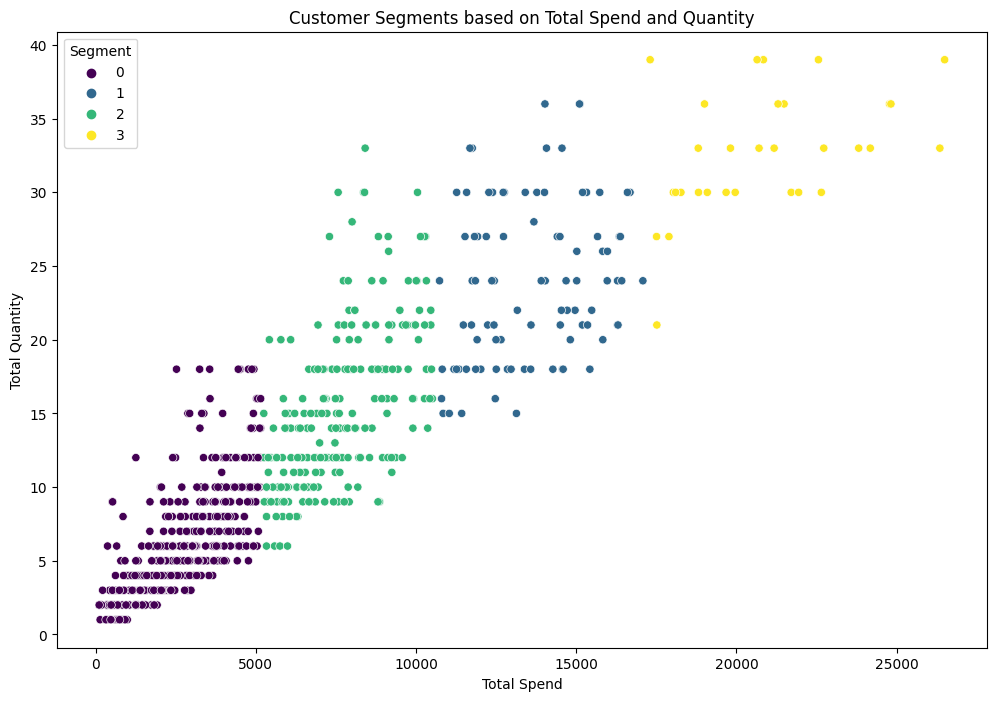

In [6]:

# Profile each segment
profile_df = customer_df.groupby('Segment').mean().reset_index()

# Visualizations
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_df, x='TotalSpend', y='TotalQuantity', hue='Segment', palette='viridis')
plt.title('Customer Segments based on Total Spend and Quantity')
plt.xlabel('Total Spend')
plt.ylabel('Total Quantity')
plt.legend(title='Segment')
plt.show()


# Visualizing data

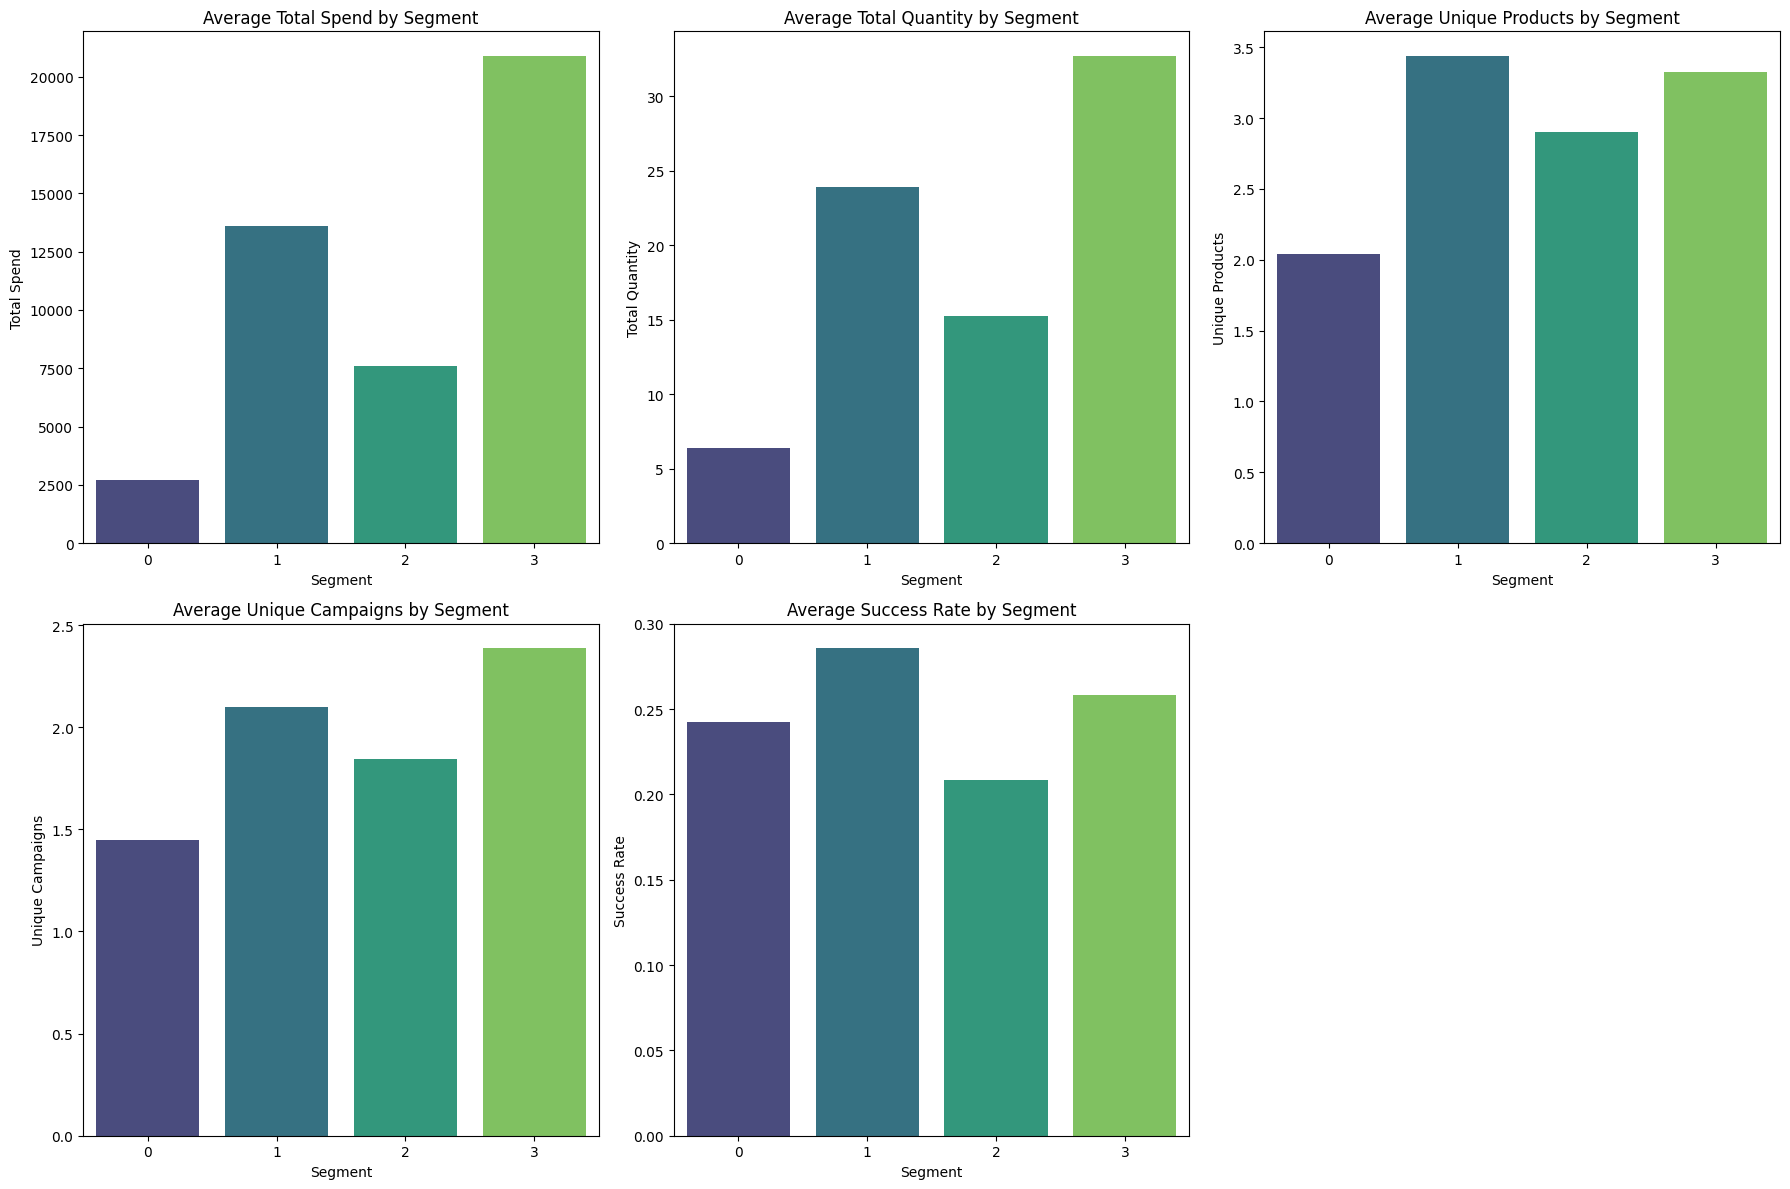

In [7]:

# Bar plots for segment characteristics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.barplot(ax=axes[0, 0], data=profile_df, x='Segment', y='TotalSpend', palette='viridis')
axes[0, 0].set_title('Average Total Spend by Segment')
axes[0, 0].set_xlabel('Segment')
axes[0, 0].set_ylabel('Total Spend')

sns.barplot(ax=axes[0, 1], data=profile_df, x='Segment', y='TotalQuantity', palette='viridis')
axes[0, 1].set_title('Average Total Quantity by Segment')
axes[0, 1].set_xlabel('Segment')
axes[0, 1].set_ylabel('Total Quantity')

sns.barplot(ax=axes[0, 2], data=profile_df, x='Segment', y='UniqueProducts', palette='viridis')
axes[0, 2].set_title('Average Unique Products by Segment')
axes[0, 2].set_xlabel('Segment')
axes[0, 2].set_ylabel('Unique Products')

sns.barplot(ax=axes[1, 0], data=profile_df, x='Segment', y='UniqueCampaigns', palette='viridis')
axes[1, 0].set_title('Average Unique Campaigns by Segment')
axes[1, 0].set_xlabel('Segment')
axes[1, 0].set_ylabel('Unique Campaigns')

sns.barplot(ax=axes[1, 1], data=profile_df, x='Segment', y='SuccessRate', palette='viridis')
axes[1, 1].set_title('Average Success Rate by Segment')
axes[1, 1].set_xlabel('Segment')
axes[1, 1].set_ylabel('Success Rate')
# Hide the empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


# Understanding Custumer Segments

In [8]:

# Detailed segment profile output
for segment in profile_df['Segment']:
    print(f"\nSegment {segment} Profile:")
    segment_profile = profile_df[profile_df['Segment'] == segment].T
    segment_profile.columns = ['Value']
    print(segment_profile)
    print("\n")



Segment 0 Profile:
                       Value
Segment             0.000000
CustomerID        494.142506
TotalSpend       2701.580491
TotalQuantity       6.402948
UniqueProducts      2.041769
UniqueCampaigns     1.449631
SuccessRate         0.242424



Segment 1 Profile:
                        Value
Segment              1.000000
CustomerID         506.010989
TotalSpend       13591.062747
TotalQuantity       23.934066
UniqueProducts       3.439560
UniqueCampaigns      2.098901
SuccessRate          0.285714



Segment 2 Profile:
                       Value
Segment             2.000000
CustomerID        515.465217
TotalSpend       7614.783348
TotalQuantity      15.230435
UniqueProducts      2.904348
UniqueCampaigns     1.843478
SuccessRate         0.208696



Segment 3 Profile:
                        Value
Segment              3.000000
CustomerID         474.451613
TotalSpend       20902.151613
TotalQuantity       32.709677
UniqueProducts       3.322581
UniqueCampaigns      2.387097


# Insights and Recommendations

In [9]:

# Summary of key insights
print("Key Insights and Recommendations:")
for segment in profile_df['Segment']:
    segment_profile = profile_df[profile_df['Segment'] == segment].T
    total_spend = segment_profile.loc['TotalSpend'].values[0]
    total_quantity = segment_profile.loc['TotalQuantity'].values[0]
    unique_products = segment_profile.loc['UniqueProducts'].values[0]
    unique_campaigns = segment_profile.loc['UniqueCampaigns'].values[0]
    success_rate = segment_profile.loc['SuccessRate'].values[0]

    print(f"\nSegment {segment}:")
    print(f"- Average Total Spend: {total_spend:.2f}")
    print(f"- Average Total Quantity: {total_quantity:.2f}")
    print(f"- Average Unique Products: {unique_products:.2f}")
    print(f"- Average Unique Campaigns: {unique_campaigns:.2f}")
    print(f"- Average Success Rate: {success_rate:.2f}")
    print(f"Recommendations for Segment {segment}:")
    if total_spend > profile_df['TotalSpend'].mean():  # Adjust the condition as necessary based on your data
        print("  Focus on retaining these high-spending customers with loyalty programs and personalized offers.")
    else:
        print("  Implement strategies to increase spending through targeted promotions and upselling.")
    if success_rate > 0.5:
        print("  Continue engaging with these customers through successful campaigns.")
    else:
        print("  Develop more effective marketing campaigns to increase engagement and interaction success rates.")

Key Insights and Recommendations:

Segment 0:
- Average Total Spend: 2701.58
- Average Total Quantity: 6.40
- Average Unique Products: 2.04
- Average Unique Campaigns: 1.45
- Average Success Rate: 0.24
Recommendations for Segment 0:
  Implement strategies to increase spending through targeted promotions and upselling.
  Develop more effective marketing campaigns to increase engagement and interaction success rates.

Segment 1:
- Average Total Spend: 13591.06
- Average Total Quantity: 23.93
- Average Unique Products: 3.44
- Average Unique Campaigns: 2.10
- Average Success Rate: 0.29
Recommendations for Segment 1:
  Focus on retaining these high-spending customers with loyalty programs and personalized offers.
  Develop more effective marketing campaigns to increase engagement and interaction success rates.

Segment 2:
- Average Total Spend: 7614.78
- Average Total Quantity: 15.23
- Average Unique Products: 2.90
- Average Unique Campaigns: 1.84
- Average Success Rate: 0.21
Recommendation